# Multivariate Linear Regression

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

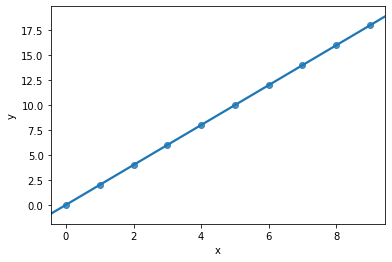

In [8]:
df=pd.DataFrame ({
   'x': range (10),
   'y': [x*2 for x in range (10)]
})
sns.regplot(x='x',y='y',data=df)

# Covariance



similar to variance 
measures degree to which values in one dataset are linearly associated with values in a second dataset 
values must all be measured using the same scale (kilo, inches, etc.) 
a large covairance CAN mean a strong relationship between the datasets, but NOT ALWAYS 
not scaled (datasets with larger values will have larger covariances, by default, but doesn't necessarily mean a stronger covariance, usually along the same Order of Magnitude)

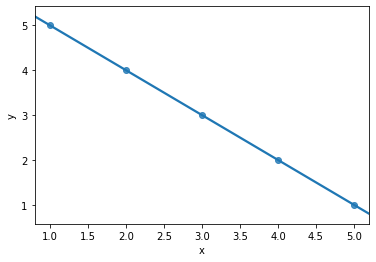

In [11]:
df2=pd.DataFrame({
   'x':[1,2,3,4,5],
   'y':[5,4,3,2,1]
})
sns.regplot(x='x',y= 'y',data=df2)

In [13]:
covar = np.cov(
   df2['x'],
   y=df2['y']
)
covar

array([[ 2.5, -2.5],
       [-2.5,  2.5]])

In [12]:
np.corrcoef(
    df['x'], #x values
    y = df['y']
)

#[[xx, xy]]
#[[yx, yy]]

array([[1., 1.],
       [1., 1.]])

In [16]:
rand_x = pd.Series(np.random.rand(10))
rand_y = pd.Series(np.random.rand(10))

np.corrcoef(rand_x, y = rand_y)

array([[ 1.        , -0.06784006],
       [-0.06784006,  1.        ]])

In [14]:
#Correlation coefficient

round ( df['x'].corr(df['y']), 2)

1.0

In [17]:
round ( rand_x.corr(rand_y), 2)

-0.07

In [18]:
#Multivariate Linear Regression

In [19]:
multi = pd.DataFrame({
    'x1': np.array(range(10)) + np.random.rand(10),
    'x2': np.array(range(10)) + np.random.rand(10),
    'y': (np.array(range(10)) * 2) + 2
})
multi.head(1)

,x1,x2,y
0,0.164708,0.500164,2


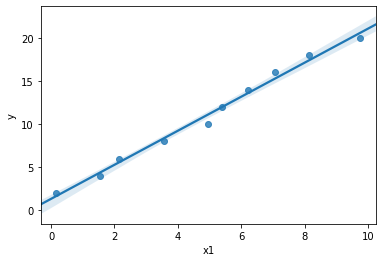

In [20]:
sns.regplot(x = 'x1', y = 'y', data = multi)

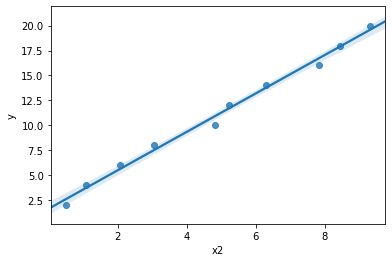

In [22]:
sns.regplot(x = 'x2', y = 'y', data = multi)

In [23]:
def decimal_str(x: float, decimals: int = 10) -> str:
    return format(x, f".{decimals}f").lstrip().rstrip('0')


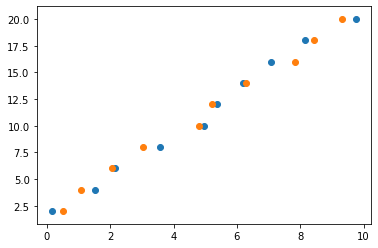

In [25]:
import matplotlib.pyplot as plt

plt.scatter(multi['x1'], multi['y'])
plt.scatter(multi['x2'], multi['y'])

In [28]:
from sklearn import linear_model

X = multi[['x1', 'x2']]
y = multi['y']

regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
intercept = regr.intercept_ # y-intercept
intercept

1.4605735544878122

In [30]:
x1_slope, x2_slope = regr.coef_

x1_slope, x2_slope

(0.8887635754615117, 1.0681038919760446)

In [31]:
regr.score(X, y) #R-squared, closer to 1 the more accurate it is

0.9955506916345493

In [32]:
#Ranges from 0 - 1

In [33]:
#Line of best fit

# y = intercept + (x1_slope * x1) + (x2_slope * x2)

In [35]:
y_vals = [intercept + (x1_slope * x) + (x2_slope * x) for x in range(10)]
y_vals

[1.4605735544878122,
 3.4174410219253684,
 5.3743084893629245,
 7.331175956800481,
 9.288043424238037,
 11.244910891675595,
 13.201778359113149,
 15.158645826550707,
 17.115513293988265,
 19.07238076142582]

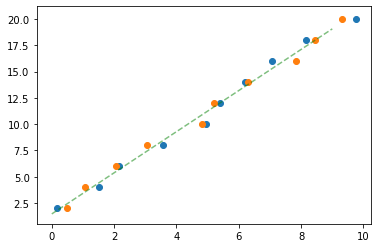

In [36]:
plt.scatter(multi['x1'], multi['y'])
plt.scatter(multi['x2'], multi['y'])

plt.plot(
    range(10),
    y_vals,
    color = 'green',
    ls = '--',
    alpha = 0.5
)

In [37]:
#Using LINEARREGRESSION.predict()

In [43]:
predict_X = pd.DataFrame({
    'x1': range(0, 21),
    'x2': range(0, 21)
})

predictions = regr.predict(predict_X)
predictions

array([ 1.46057355,  3.41744102,  5.37430849,  7.33117596,  9.28804342,
       11.24491089, 13.20177836, 15.15864583, 17.11551329, 19.07238076,
       21.02924823, 22.9861157 , 24.94298316, 26.89985063, 28.8567181 ,
       30.81358557, 32.77045303, 34.7273205 , 36.68418797, 38.64105544,
       40.5979229 ])

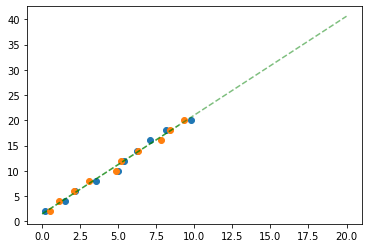

In [46]:
plt.scatter(multi['x1'], multi['y'])
plt.scatter(multi['x2'], multi['y'])

plt.plot(
    range(0, 21),
    predictions,
    y_vals,
    color = 'green',
    ls = '--',
    alpha = 0.5
)